24. Data and Sampling Distributions - We sample data from population for analysis - also called Sampling - 
<h5>Sample</h5>A sample is a subset of data from a larger data set
<br>
<h5>Random Sampling</h5>Random sampling is a process in which each available member of the population
being sampled has an equal chance of being chosen for the sample at each draw.(with and without replacement both possible). Random sampling is not easy - labor intensive - defined population is required to create representative sample.
<br>
<h5>Sample Bias</h5>A sample that misrepresents the population.
<br>
<h5>Self-Selection Sampling Bias</h5>When we are getting the data from source which has some motivation for people to produce and there self selection have major impact on that data. This introduces the self selection bias.
<br>
<h5>Bias</h5>Errors introduced in data due to sampling process. There is difference between errors due to random chance and errors due to bias.
<br>
<h5>Size Versus Quality: When Does Size Matter?</h5>sometimes surprising that smaller is better. Time and effort spent on random sampling not only reduces bias but also allows greater attention to data exploration and data quality. The classic scenario for the value of big data is when the data is not only big but sparse as well.
<br>
<h5>Selection Bias</h5>Selection bias refers to the practice of selectively choosing data—consciously or unconsciously—in a way that leads to a conclusion that is misleading or ephemeral. Thought experiement of getting 10 heads in a row on coin flip. To test the selection bias we can put down hold out set for model validation
<br>
<h5>Regression to the mean</h5>Regression to the mean refers to a phenomenon involving successive measurements on a given variable: extreme observations tend to be followed by more central ones. Rookie of the year performs well in first season but why not in second. Its a consequence of selection bias - consecutive measurements tend to go to centre of all observations hence in second year same rookie will not perform as good.
<br>
<h5>Sampling Distribution</h5>When we have large amount of data - we take sample to calculate something - but it might have some error - so we take another sample and calculate the same thing and we go on doing this - and compare multiple samples for their distribution. Statistic we calculate from each of these samples - is normally distributed - bell shaped curve
<br>
<h5>Central Limit Theorem</h5>It says that the means drawn from multiple samples will resemble the familiar bell-shaped normal curve even if the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.
<br>
<h5>Standard Error</h5>The standard error is a single metric that sums up the variability in the sampling distribution for a statistic. SE = S/sqrt(n) -- As the sample size increases standard error decreases -- standard error measures the variability of sample statistic
<br>
<h5>The Bootstrap</h5>Draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample. Called bootstrap because it does not make any assuptions about the given data.
<br>
<h5>Confidence Intervals</h5>The percentage of confidence intervals, constructed in the same way from the same population, that are expected to contain the statistic of interest.There is a natural human aversion to uncertainty.Presenting an estimate not as a single number but as a range is one way to counteract this tendency.<br>
Draw a random sample of size n with replacement from the data (a resample).<br>
Record the statistic of interest for the resample.<br>
Repeat steps 1–2 many (R) times.<br>
For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from either end of the distribution.<br>
The trim points are the endpoints of an x% bootstrap confidence interval
<br>
<h5>Normal Distribution</h5>In a normal distribution 68% of the data lies within one standard deviation of the mean, and 95% lies within two standard deviations.99.7% of the data lies within three standard deviation of the mean. Also called Empirical formula
<br>
<h5>Standard Normal Distribution</h5> standard normal distribution, you subtract the mean and then divide by the standard deviation; this is also called normalization or standardization. Transformed value is called z-score.
<br>
<h5>QQ plot(quantile-quantile plot)</h5>This plot is majorly used to assess if given data has normal distribution or not.



In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from IPython.display import display, HTML
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv("Player.csv")
df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [7]:
keep = ['player_name', 'birthday', 'height', 'weight']
df = df[keep]

In [8]:
#BOOTSTRAP - taking sample with replacement - calculateing its statistic - for multiple samples and then calculating 
from sklearn.utils import resample
re = []
for i in range(2000):
    re.append(resample(df.height).mean())
redf = pd.Series(re)
print(redf.mean())
print(df.height.mean())
print('Bootstrap Statistics:')
print(f'original: {df.height.mean()}')
print(f'bias: {round(redf.mean() - df.height.mean(),6)}')
print(f'std. error: {redf.std()}')

181.86852790596112
181.86744484628662
Bootstrap Statistics:
original: 181.86744484628662
bias: 0.001083
std. error: 0.06036955563485378


((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

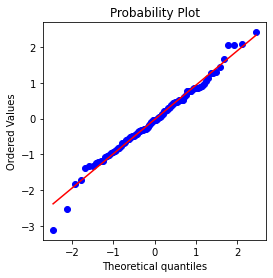

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)